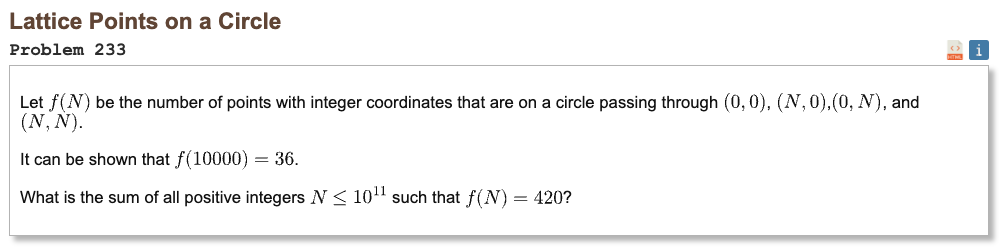

## Initial approach

* the circle is fixed by the four corner points, and after a simple shift and scale the lattice points on it match integer solutions of a sum of two squares problem
* the count f(N) depends only on the prime factors of N that are 1 mod 4, primes that are 3 mod 4 and the prime 2 do not change the count
* for f(N)=420 you can turn it into a small factor matching task, because 420 becomes a product of a few odd factors that come from exponents of 1 mod 4 primes
* this gives a few possible exponent patterns, like one prime with a huge exponent, or two primes with medium exponents, or three primes with smaller exponents
* for each pattern, assign the larger exponents to the smaller 1 mod 4 primes to keep N as small as possible, then enumerate all valid bases under 10^11
* for each base, multiply by any number made only from 2 and primes that are 3 mod 4, as long as the result stays under 10^11
* add up every N you generate this way, that sum is the required answer

In [1]:
import math

LIMIT = 10**11

def sieve(limit):
    is_p = bytearray(b"\x01") * (limit + 1)
    if limit >= 0:
        is_p[0] = 0
    if limit >= 1:
        is_p[1] = 0
    r = int(math.isqrt(limit))
    for i in range(2, r + 1):
        if is_p[i]:
            start = i * i
            step = i
            is_p[start:limit + 1:step] = b"\x00" * (((limit - start) // step) + 1)
    return [i for i in range(2, limit + 1) if is_p[i]]

def gen_bases(primes_1mod4, exps, limit):
    exps = sorted(exps, reverse=True)
    out = []

    def rec(idx, start_pi, cur):
        if idx == len(exps):
            out.append(cur)
            return
        e = exps[idx]
        for j in range(start_pi, len(primes_1mod4)):
            p = primes_1mod4[j]
            val = cur * (p ** e)
            if val > limit:
                break
            rec(idx + 1, j + 1, val)

    rec(0, 0, 1)
    return out

def gen_multipliers(primes_3mod4, limit):
    out = []

    def rec(i, cur):
        out.append(cur)
        for j in range(i, len(primes_3mod4)):
            p = primes_3mod4[j]
            if cur * p > limit:
                break
            v = cur * p
            while v <= limit:
                rec(j + 1, v)
                v *= p

    rec(0, 1)
    return out

def solve():
    primes = sieve(2_000_000)
    p1 = [p for p in primes if p % 4 == 1]
    p3 = [p for p in primes if p % 4 == 3]

    exponent_patterns = [
        [52],
        [17, 1],
        [10, 2],
        [7, 3],
        [3, 2, 1],
    ]

    multipliers = gen_multipliers(p3, LIMIT)
    multipliers.sort()

    total = 0

    for exps in exponent_patterns:
        bases = gen_bases(p1, exps, LIMIT)
        for base in bases:
            max_m = LIMIT // base
            for m in multipliers:
                if m > max_m:
                    break
                t = max_m // m
                amax = int(math.log2(t)) if t > 0 else -1
                if amax >= 0:
                    two_sum = (1 << (amax + 1)) - 1
                    total += base * m * two_sum

    return total

```python
%%time
result = solve()
print("Result:", result)

```

* Note: Correct solution, but not performance-optimized.  
* Runtime is very long at the given limit.  
* Should be optimized later when there is spare time.